In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score, roc_curve
from sklearn.preprocessing import normalize
from sklearn import svm
from xgboost import XGBClassifier
from scripts.utils import load_instafake, load_instafinal, load_instaauto

In [2]:
iris_data = load_iris()
instafake_data = load_instafake()
instafinal_data = load_instafinal()
instaauto_data = load_instaauto()

# Initial Features

In [47]:
instafake_data['data'].head()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_profil_pic,user_is_private,user_media_count,username_digit_count,username_length
0,0.012907,0.0,25.0,1937.0,1.0,1.0,0.0,0.0,10.0
1,0.078603,0.0,324.0,4122.0,1.0,0.0,0.0,4.0,15.0
2,0.037594,0.0,15.0,399.0,0.0,0.0,0.0,3.0,12.0
3,0.130841,0.0,14.0,107.0,1.0,0.0,1.0,1.0,10.0
4,0.056762,0.0,264.0,4651.0,1.0,0.0,0.0,0.0,14.0


In [48]:
instafinal_data['data'].head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0


In [4]:
instaauto_data['data'].head()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_external_url,user_has_highligh_reels,user_media_count,user_tags_count,username_digit_count,username_length
0,0.226787,133.0,1612.0,7108.0,1.0,0.0,97.0,36.0,0.0,12.0
1,3.320175,99.0,3028.0,912.0,0.0,1.0,863.0,77.0,0.0,11.0
2,4.505618,120.0,5213.0,1157.0,1.0,1.0,149.0,56.0,0.0,18.0
3,7.046512,55.0,12423.0,1763.0,0.0,0.0,33.0,2.0,0.0,13.0
4,3.936982,33.0,9496.0,2412.0,0.0,1.0,1000.0,91.0,0.0,8.0


In [5]:
instaauto_data['data'].shape

(1400, 10)

# Data Preperation

In [6]:
import pandas as pd
from sklearn.preprocessing import normalize
from scripts.utils import generic_load

ndata = generic_load('./insta_meme/resources/dataset.csv',target='automated_behaviour')
ndata['target'].to_csv('./insta_meme/resources/data-target.csv',index=False)
pd.DataFrame(normalize(ndata['data'])).to_csv('./insta_meme/resources/data-data.csv',index=False)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(normalize(instaauto_data['data']),instaauto_data['target'],test_size=.2,random_state=42,stratify=instaauto_data['target'])

In [31]:
X_train

array([[7.67231126e-04, 1.18694181e-02, 5.42432406e-01, ...,
        2.37388362e-02, 0.00000000e+00, 1.54302435e-02],
       [1.43703108e-04, 5.24171653e-03, 7.69817551e-01, ...,
        1.66781890e-03, 0.00000000e+00, 7.14779527e-04],
       [2.46831321e-04, 1.69068127e-02, 9.02415311e-01, ...,
        1.97435262e-02, 4.53874166e-04, 1.58855958e-03],
       ...,
       [3.51080734e-03, 5.56653309e-02, 6.60031781e-01, ...,
        7.95219013e-03, 0.00000000e+00, 4.77131408e-02],
       [7.15342342e-04, 8.84732544e-02, 6.54538243e-01, ...,
        2.45759040e-03, 0.00000000e+00, 1.22879520e-02],
       [2.38494156e-04, 2.53559188e-02, 8.09687661e-01, ...,
        2.16120918e-02, 0.00000000e+00, 1.87191347e-03]])

In [30]:
y_train

1348    0.0
14      1.0
467     1.0
632     1.0
842     0.0
       ... 
17      1.0
808     0.0
792     0.0
455     1.0
317     1.0
Name: automated_behaviour, Length: 1120, dtype: float64

# XGBoost

In [23]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_data['data'], iris_data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(objective='binary:logistic')
# fit model
bst.fit(X_train_iris, y_train_iris)
# make predictions
preds = bst.predict(X_test_iris)

In [24]:
print(classification_report(preds, y_test_iris))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [25]:
xg_clf = XGBClassifier(objective='binary:logistic')
xg_clf.fit(X_train,y_train)
xg_res = xg_clf.predict(X_test)

In [26]:
confusion_matrix(xg_res,y_test)

array([[133,  14],
       [  7, 126]])

In [27]:
accuracy_score(xg_res, y_test)

0.925

In [18]:
print(classification_report(xg_res, y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       143
           1       0.91      0.93      0.92       137

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



In [20]:
y_probs = xg_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

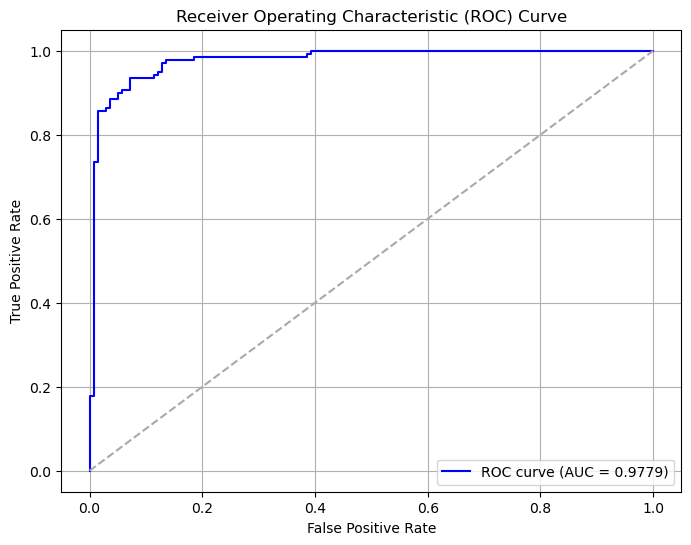

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SVM with Meta-Heuristic Optimisation

SVM with no feature selection for base test

In [43]:
svm_clf = svm.SVC()
svm_clf.fit(x_train,y_train)
svm_res = svm_clf.predict(x_test)

In [50]:
print(confusion_matrix(svm_res, y_test))

[[196  13]
 [  3  27]]


In [44]:
print(classification_report(svm_res, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       209
         1.0       0.68      0.90      0.77        30

    accuracy                           0.93       239
   macro avg       0.83      0.92      0.87       239
weighted avg       0.95      0.93      0.94       239



In [ ]:
svvm_clf = svm.SVC()
svvm_clf.fit(